## 1.Data Cleaning

#### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [10]:
#Read the dataset
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [12]:
#Get some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


#### Handling Null Values

In [15]:
data.isnull().sum()
# Day feature has no null values, class feature have 2 and remaining all have 1 null value each

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [17]:
data.isnull().any(axis=1) 
# We are unable to see all records here 

0      False
1      False
2      False
3      False
4      False
       ...  
241    False
242    False
243    False
244    False
245    False
Length: 246, dtype: bool

In [19]:
# Print the records that are having null values
data[data.isnull().any(axis=1)]
#Records 122 & 167 are having null values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


- The dataset contains 2 regions 'Bejaia Region' and 'Sidi-Bel Abbes Region'
- Make a new column based on the region

In [21]:
df = data
df.loc[:122,'region'] = 0
df.loc[122:,'region'] = 1

In [23]:
df.info()
# One feature is float (Region) which take more memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [25]:
#Convert dtype of region into int
df[['region']] = df[['region']].astype(int)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [27]:
#Remove the null values
df = df.dropna().reset_index(drop = True)

In [29]:
df.iloc[[122]]
#We need to drop this column too

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [31]:
df = df.drop(122).reset_index(drop=True)

In [33]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


#### Handling Feature names & datatypes

In [35]:
df.columns
#There are some spaces in the column names and we need to fix that

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [38]:
df.columns = df.columns.str.strip()
df.columns
#White spaces are removed in the column names

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [40]:
# Change the required columns into int datatype
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [42]:
# Change the required columns into float datatype
# The following code converts the dtype of all columns into float except columns feature
objects = [feature for feature in df.columns if df[feature].dtype == 'O']
print(objects)
for obj in objects:
    if obj!= 'Classes':
        df[obj] = df[obj].astype(float)
    

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']


In [46]:
# Now the dtype of all features is fixed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


#### Summary of the dataset

In [49]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


#### Save the cleaned dataset

In [52]:
#Save the cleaned dataset
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv',index=False)

## 2.Exploratory DataAnalysis and Feature Engineering

In [55]:
#Drop the unnecessary columns
#As our dependent (output feature) is FWI which is independent of day,month,year we can remove those features
df_copy = df.drop(['day','month','year'],axis = 1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [57]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [59]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [61]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'region'}>]], dtype=object)

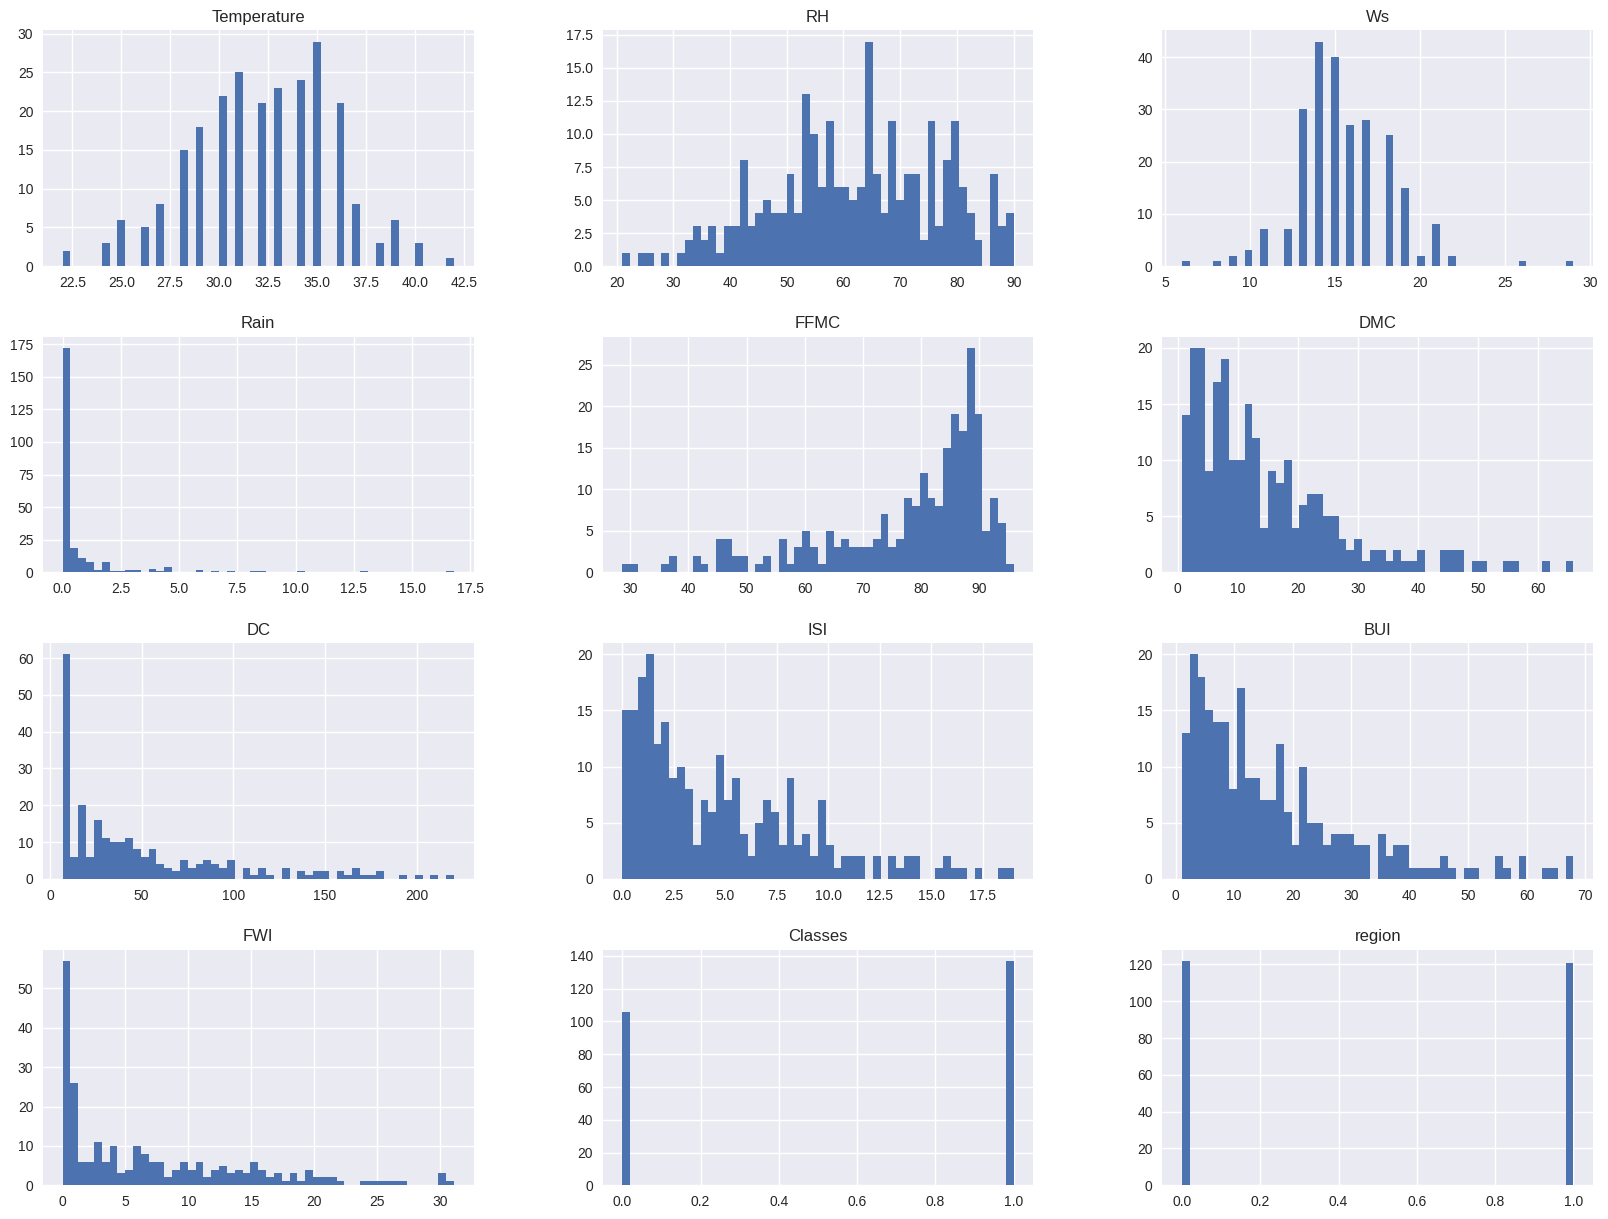

In [63]:
#Plot density plots for all features
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))

In [65]:
percentage = df_copy['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Pie chart')

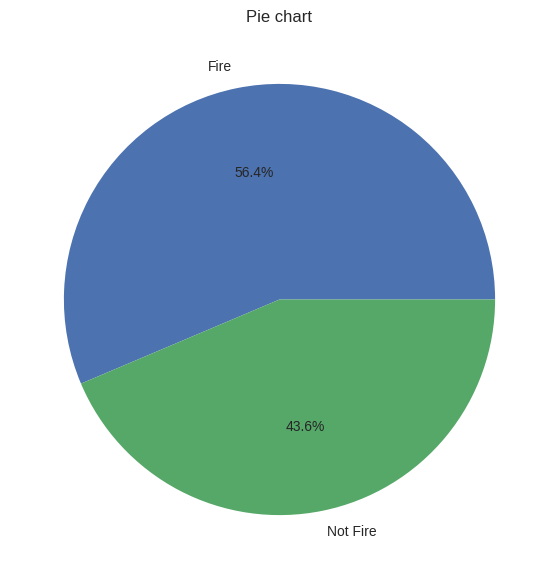

In [67]:
#Plotting piechart
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=['Fire','Not Fire'],autopct='%1.1f%%')
plt.title('Pie chart')

In [69]:
#Correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

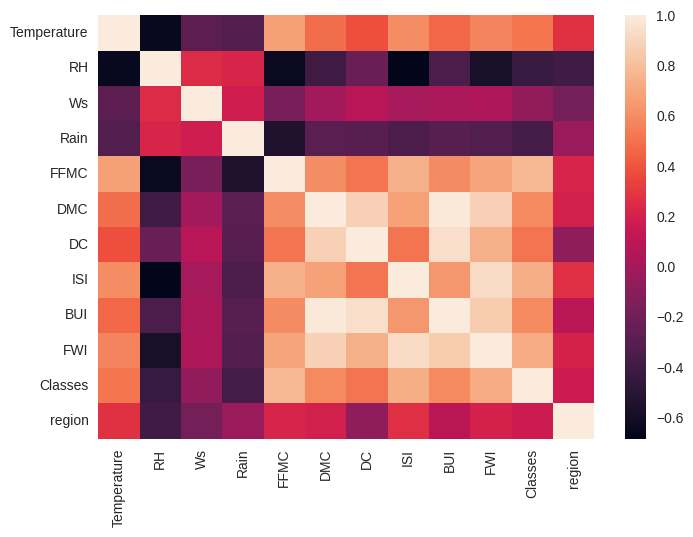

In [71]:
#Heatmap
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

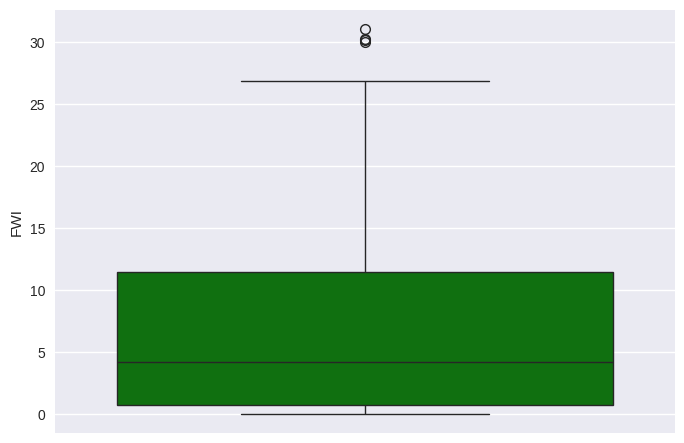

In [73]:
#Boxplots (To visualize the outliers)
sns.boxplot(df['FWI'],color='green')

In [75]:
df.head()
#For every day in every month we have data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [77]:
df.loc[df['region']==1]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


#### Monthly Fire Analysis

Text(0.5, 1.0, 'Fire analysis of Sidi-Bel Abbes Region')

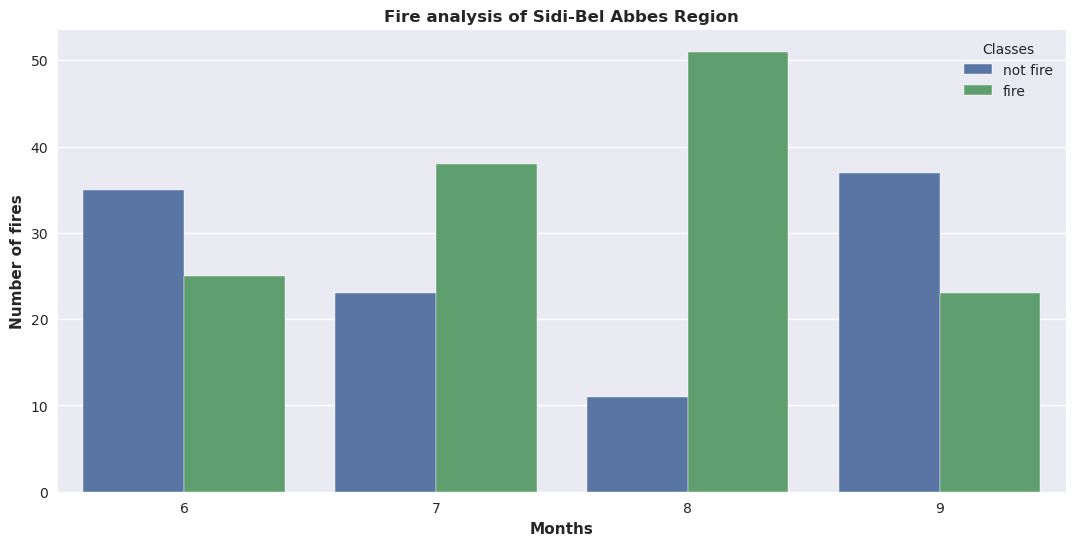

In [80]:
#Monthly fire analysis for Sidi-Bel Abbes Region
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
dftemp = df.loc[df['region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title('Fire analysis of Sidi-Bel Abbes Region',weight='bold')

Text(0.5, 1.0, 'Fire analysis of Bejaia Region')

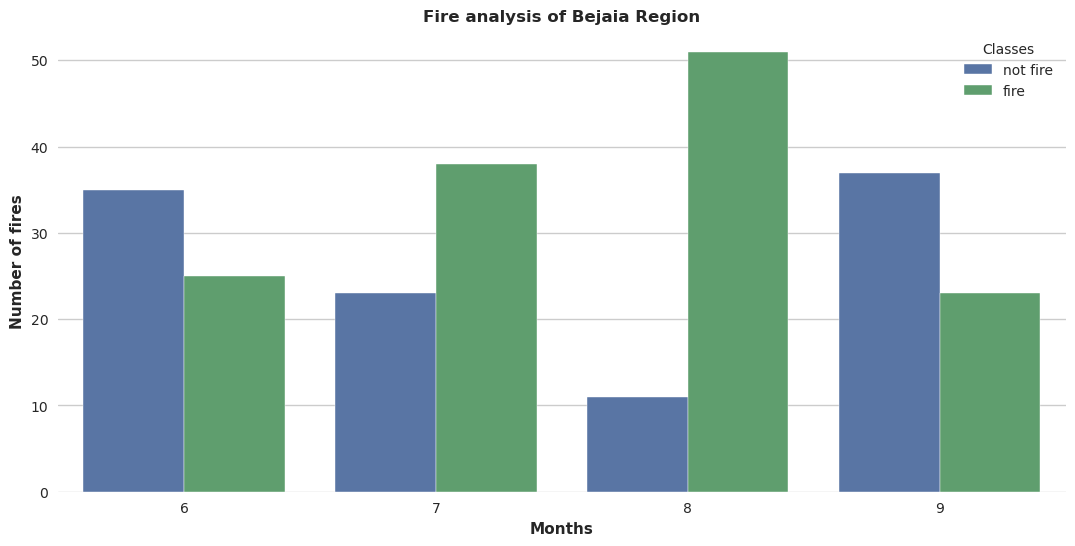

In [82]:
#Monthly fire analysis for Bejaia Region
dftemp = df.loc[df['region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title('Fire analysis of Bejaia Region',weight='bold')

- Its observed that August and September had the most no:of forest fires for both regions
- Most fires happened in August
- Less fires happened in September

## 3.Feature Selection

In [86]:
df = df_copy

In [88]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [90]:
#Divide the dataset into independent and dependent features
X = df.drop('FWI',axis=1)
y = df['FWI']

In [92]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [94]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [96]:
#Train-Test-Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [98]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [100]:
#Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

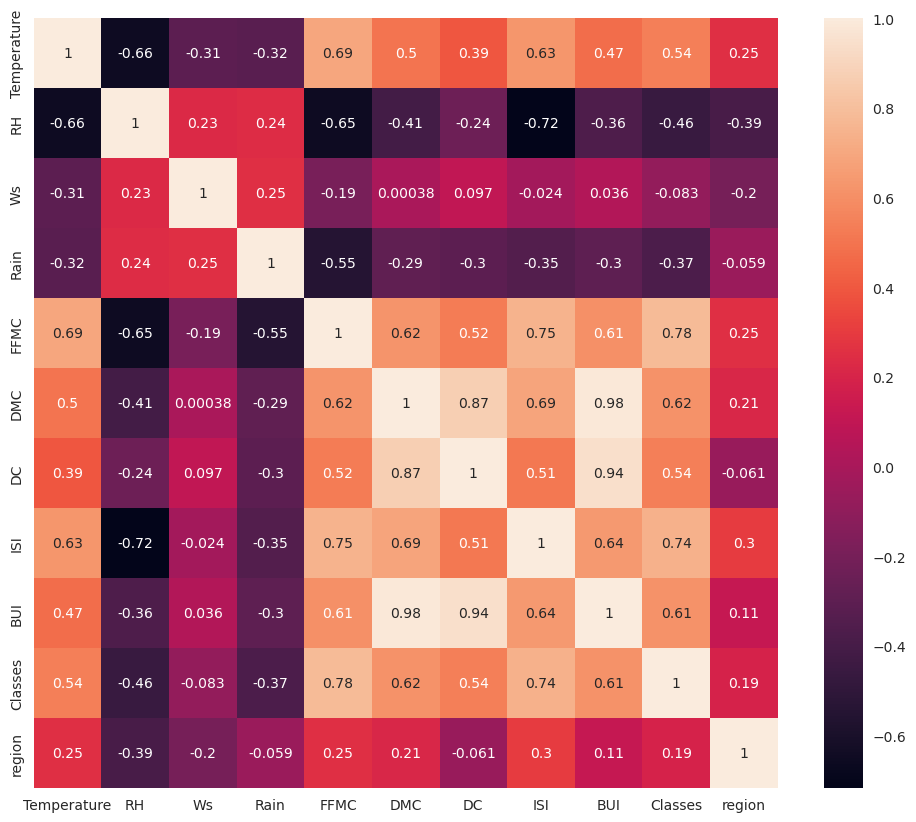

In [102]:
#Check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [104]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [106]:
# Threshold is set by the domain experts
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [108]:
# Drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [110]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

## 4.Feature Scaling or Standardization

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

#### Box-Plots to understand the effect of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

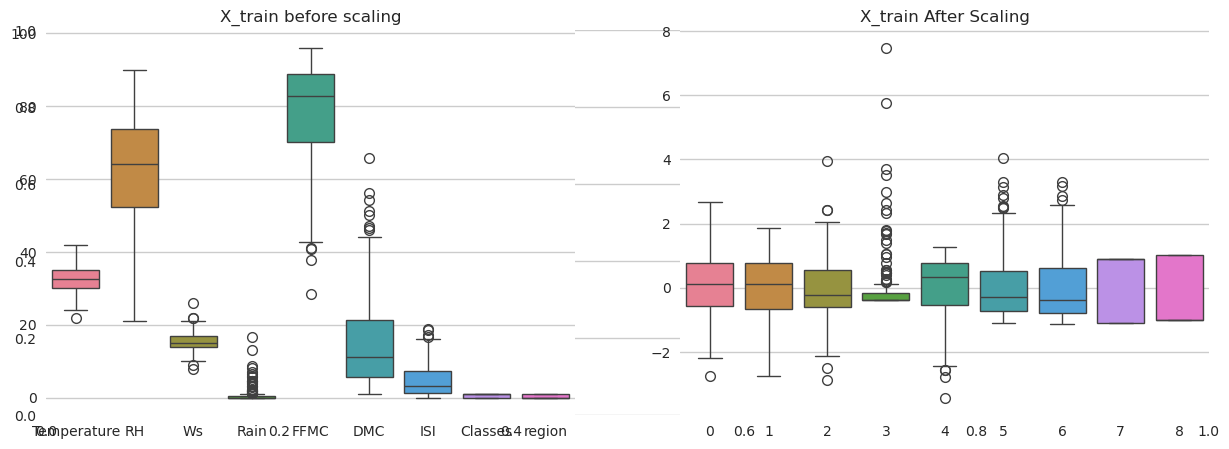

In [118]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## 5.Model Training

#### Linear Regression Model

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
mae,score

(0.5468236465249977, 0.9847657384266952)

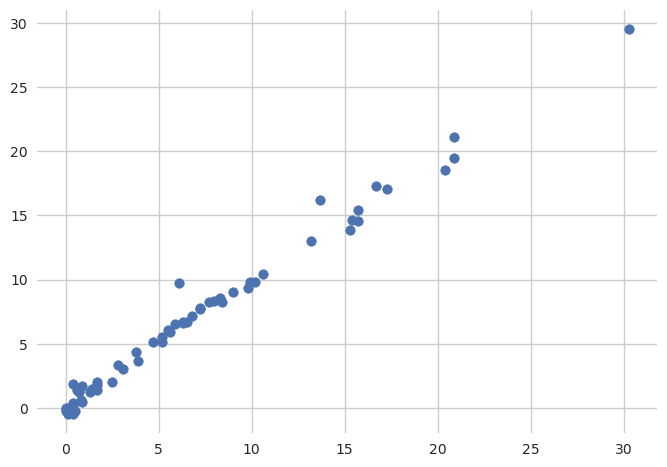

In [123]:
plt.scatter(y_test,y_pred)

#### Lasso Regression

In [126]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
mae,score

(1.1331759949144087, 0.9492020263112388)

#### Ridge Regression

In [129]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
mae,score

(0.5642305340105683, 0.9842993364555513)

#### Elastic Net

In [132]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train_scaled,y_train)
y_pred = en.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
mae,score

(1.8822353634896, 0.8753460589519703)

#### Cross Validation LassoCV

In [135]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(cv=5)
lcv.fit(X_train_scaled,y_train)
y_pred = lcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
mae,score

(0.6199701158263436, 0.9820946715928274)

In [137]:
lcv.alpha_

0.05725391318234411

In [139]:
lcv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [141]:
lcv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

#### RidgeCV

In [144]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(cv=5)
rcv.fit(X_train_scaled,y_train)
y_pred = l=rcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
mae,score

(0.5642305340105683, 0.9842993364555513)

In [146]:
rcv.alpha_

1.0

In [148]:
rcv.alphas

(0.1, 1.0, 10.0)

In [150]:
rcv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

#### ElasticNetCV

In [153]:
from sklearn.linear_model import ElasticNetCV
ecv = ElasticNetCV(cv=5)
ecv.fit(X_train_scaled,y_train)
y_pred = lcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
mae,score

(0.6199701158263436, 0.9820946715928274)